In [2]:
# Move to Homomers folder
!pwd
%cd /mnt/c/Users/laura/SMTB18/SMTB18_Project/Data/Heteromers

/mnt/c/Users/laura/SMTB18/SMTB18_Project/Notebooks
/mnt/c/Users/laura/SMTB18/SMTB18_Project/Data/Heteromers


# Bash pipeline

In [3]:
ls

1a3n.pdb*  5cy3.pdb*           P13804.fasta*  P29295.fasta*  PoA6T9.fasta*
1eer.pdb*  blast_protList.sh*  P13804.fst*    P29295.fst*    PoA6T9.fst*
1efv.pdb*  G5ECF1.blast*       P18956.blast*  P54784.blast*  protList.tab*
1zhi.pdb*  G5ECF1.fasta*       P18956.fasta*  P54784.fasta*  Q9XV58.blast*
2e0x.pdb*  G5ECF1.fst*         P18956.fst*    P54784.fst*    Q9XV58.fasta*
3a7a.pdb*  P01588.blast*       P20449.blast*  P68871.blast*  Q9XV58.fst*
3nvo.pdb*  P01588.fasta*       P20449.fasta*  P68871.fasta*
3peu.pdb*  P01588.fst*         P20449.fst*    P68871.fst*
3zhe.pdb*  P13804.blast*       P29295.blast*  PoA6T9.blast*


In [13]:
# Retreive protein sequence
!python3 ../../Scripts/01.getSequences.py protList.tab

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
https://files.rcsb.org/download/5cy3.pdb
-1 / unknownhttps://files.rcsb.org/download/3peu.pdb
-1 / unknownhttps://files.rcsb.org/download/1zhi.pdb
-1 / unknownhttps://files.rcsb.org/download/1A3N.pdb
-1 / unknownhttps://files.rcsb.org/download/1eer.pdb
-1 / unknownhttps://files.rcsb.org/download/1EFV.pdb
-1 / unknownhttps://files.rcsb.org/download/2E0X.pdb
-1 / unknownhttps://files.rcsb.org/download/3a7a.pdb
-1 / unknownhttps://files.rcsb.org/download/3Zhe.pdb
-1 / unknownhttps://files.rcsb.org/download/3NVO.pdb
-1 / unknownP29295
https://www.uniprot.org/uniprot/P29295.fasta
100% [..............................................................] 642 / 642P20449
https://www.uniprot.org/uniprot/P20449.fasta
100% [..............................................................] 630 / 630P54784
https://www.uniprot.org/unip

In [14]:
# Write the blast code
!python3 ../../Scripts/02.getBLAST.py protList.tab

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
# Run blast code  
!bash blast_protList.sh

In [8]:
!bash ../../Scripts/runMAFFT.sh

G5ECF1
G5ECF1.fst

##### atgcfreq = 0.221425
nseq =  46
distance =  local
iterate =  16
cycle =  1
nthread = 0
lastonce = 0
done.
scoremtx = 1
charsize=128
   44 / 46

##### writing hat3
pairlocalalign (aa) Version 7.271 alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
Loading 'hat3' ... 
done.
done.
scoremtx = 1
charsize=128
Gap Penalty = -1.53, +0.00, +0.00
Loading 'hat2' ... done.
Constructing a UPGMA tree ... 
   40 / 46
done.

Progressive alignment ... 
STEP    41 /45 c
Reallocating..done. *alloclen = 4605
STEP    45 /45 c
done.
tbfast (aa) Version 7.271 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
Loading 'hat3' ... done.
done.
scoremtx = 1
charsize=128

   40 / 46
Segment   1/  1    1-2287
STEP 006

In [11]:
!bash ../../Scripts/runClean.sh 

G5ECF1
G5ECF1.alm
P01588
P01588.alm
P13804
P13804.alm
P18956
P18956.alm
P20449
P20449.alm
Traceback (most recent call last):
  File "../../Scripts/04.cleanAligment.py", line 13, in <module>
    alig = readAlig(inputFile, 'fasta')
  File "/mnt/c/Users/laura/SMTB18/SMTB18_Project/Scripts/functions.py", line 61, in readAlig
    alignment = AlignIO.read(open(file), form)
  File "/usr/local/lib/python3.5/dist-packages/Bio/AlignIO/__init__.py", line 439, in read
    raise ValueError("No records found in handle")
ValueError: No records found in handle
P29295
P29295.alm
P54784
P54784.alm
P68871
P68871.alm
PoA6T9
PoA6T9.alm
Traceback (most recent call last):
  File "../../Scripts/04.cleanAligment.py", line 15, in <module>
    toDel = findGaps(alig, code)
  File "/mnt/c/Users/laura/SMTB18/SMTB18_Project/Scripts/functions.py", line 24, in findGaps
    seq = alig[name]
KeyError: 'PoA6T9'
Q9XV58
Q9XV58.alm


In [12]:
ls

1a3n.pdb*           P01588.alm*      P18956.shannon*  P68871.blast*
1eer.pdb*           P01588.aln*      P20449.alm*      P68871.fasta*
1efv.pdb*           P01588.blast*    P20449.blast*    P68871.fst*
1zhi.pdb*           P01588.fasta*    P20449.fasta*    PoA6T9.alm*
2e0x.pdb*           P01588.fst*      P20449.fst*      PoA6T9.blast*
3a7a.pdb*           P01588.shannon*  P29295.alm*      PoA6T9.fasta*
3nvo.pdb*           P13804.alm*      P29295.aln*      PoA6T9.fst*
3peu.pdb*           P13804.aln*      P29295.blast*    protList.tab*
3zhe.pdb*           P13804.blast*    P29295.fasta*    Q9XV58.alm*
5cy3.pdb*           P13804.fasta*    P29295.fst*      Q9XV58.aln*
blast_protList.sh*  P13804.fst*      P54784.alm*      Q9XV58.blast*
G5ECF1.alm*         P13804.shannon*  P54784.aln*      Q9XV58.fasta*
G5ECF1.aln*         P18956.alm*      P54784.blast*    Q9XV58.fst*
G5ECF1.blast*       P18956.aln*      P54784.fasta*    Q9XV58.shannon*
G5ECF1.fasta*       P18956.blast*    P54784.fst*
G5ECF1.fs

In [13]:
!bash ../../Scripts/runShannons.sh

G5ECF1
G5ECF1.aln
P01588
P01588.aln
P13804
P13804.aln
P18956
P18956.aln
P29295
P29295.aln
P54784
P54784.aln
P68871
P68871.aln
Q9XV58
Q9XV58.aln


In [14]:
!bash ../../Scripts/runRate.sh

G5ECF1
G5ECF1.aln
P01588
P01588.aln
P13804
P13804.aln
P18956
P18956.aln
P29295
P29295.aln
P54784
P54784.aln
P68871
P68871.aln
Q9XV58
Q9XV58.aln


# Analysis of results

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


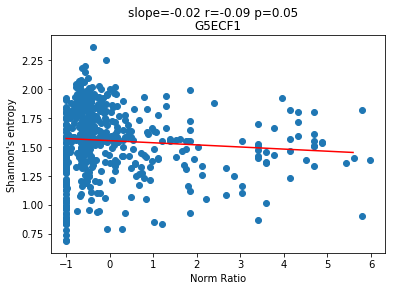

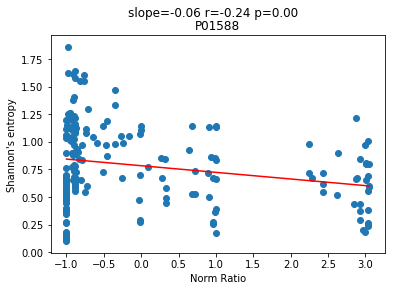

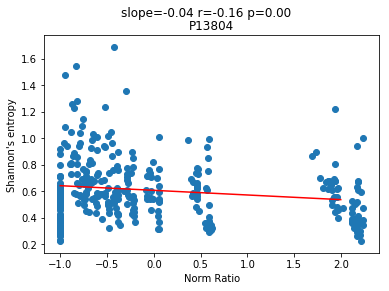

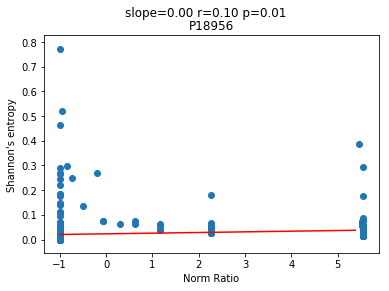

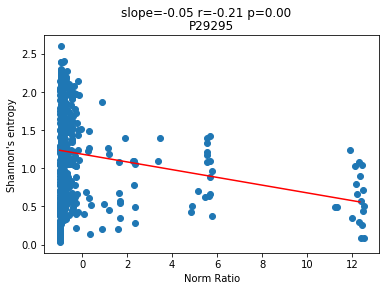

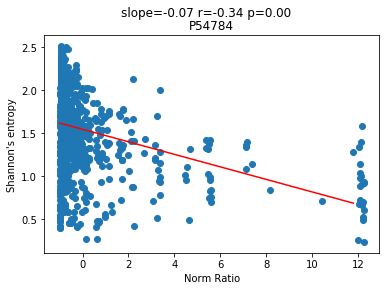

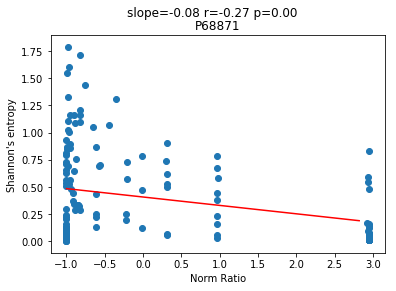

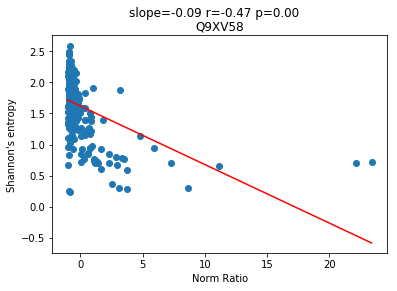

In [17]:
code = 'B3GWA1'

#for code in ('B3GWA1', 'O75874', 'P02766', 'P0A6C8', 'P32325', 'Q06592'):
for code in ('G5ECF1', 'P01588', 'P13804', 'P18956', 'P29295', 'P54784', 'P68871', 'Q9XV58'):
    shan = pd.read_table(code+'.shannon')
    rate = pd.read_table(code+'.rate')
    # X norm
    x = rate["norm"]
    # Y shann
    y = shan["entropy"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    lx = np.arange(start=min(x), stop=max(x), step=len(x)/1000)
    ly = tuple(slope*i + intercept for i in lx)
    plt.scatter(x,y)
    plt.plot(lx, ly, color='red')
    plt.title(code)
    plt.suptitle('slope=%.2f r=%.2f p=%.2f'%(slope, r_value, p_value))
    plt.xlabel('Norm Ratio')
    plt.ylabel("Shannon's entropy")
    plt.show()

In [19]:
cd ../Homomers/

/mnt/c/Users/laura/SMTB18/SMTB18_Project/Data/Homomers


In [20]:
ls *.pdb

1qso.pdb*  2v43.pdb*  3qbz.pdb*  4n0a.pdb*  5ca5.pdb*
2o3j.pdb*  2x2w.pdb*  4kzo.pdb*  4n85.pdb*


In [30]:
a = "1qso.pdb*  2v43.pdb*  3qbz.pdb*  4n0a.pdb*  5ca5.pdb *2o3j.pdb*  2x2w.pdb*  4kzo.pdb*  4n85.pdb*"
a = a.replace('*', '')
lst = a.split()
print(a)
 


1qso.pdb  2v43.pdb  3qbz.pdb  4n0a.pdb  5ca5.pdb 2o3j.pdb  2x2w.pdb  4kzo.pdb  4n85.pdb


In [31]:
from Bio.PDB.PDBParser import PDBParser   

In [36]:
parser = PDBParser(PERMISSIVE=1)
for code in lst:
    st = parser.get_structure('st', code)
    chains = list(st.get_chains())
    print(len(chains))

4
3
1


/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7469.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7550.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7626.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13387.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13394.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13397.
  PDBCons

10
2


/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11635.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11653.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11671.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11689.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11981.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12340.
  PDBC

3
2
3
2


/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20391.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20454.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20513.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20572.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20733.
  PDBConstructionWarning)
/usr/local/lib/python3.5/dist-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20832.
  PDBC